## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    minimum = x.min( )
    maximum = x.max( )
    x = 2 * ( x - minimum ) / ( maximum -minimum ) - 1 
    if flatten :
        x = x.reshape( ( len( x ), -1 ) )
    return x

def preproc_y(y, num_classes=10):
    if y.shape[ -1 ] == 1 :
        y = keras.utils.to_categorical( y, num_classes )
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0714 21:52:43.316262  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 21:52:43.483272  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 21:52:43.534275  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0714 21:52:43.804290  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 21:52:43.813291  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 21:52:43.975300  7360 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 21:52:44.409325  7360 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 420us/step - loss: 2.2986 - acc: 0.1155 - val_loss: 2.2779 - val_acc: 0.1194
Epoch 2/100
50000/50000 [==============================] - 22s 437us/step - loss: 2.2324 - acc: 0.1537 - val_loss: 2.2012 - val_acc: 0.1727
Epoch 3/100
50000/50000 [==============================] - 22s 437us/step - loss: 2.1572 - acc: 0.1900 - val_loss: 2.1614 - val_acc: 0.1974
Epoch 4/100
50000/50000 [==============================] - 22s 440us/step - loss: 2.1125 - acc: 0.2132 - val_loss: 2.1125 - val_acc: 0.2204
Epoch 5/100
50000/50000 [==============================] - 22s 441us/step - loss: 2.0670 - acc: 0.2400 - val_loss: 2.0853 - val_acc: 0.2386
Epoch 6/100
50000/50000 [==============================] - 22s 438us/step - loss: 2.0270 - acc: 0.2611 - val_loss: 2.0367 - val_acc: 0.2569
Epoch 7/100
50000/50000 [==============================] - 22s 441us/step - loss: 1.9820 - acc: 0.2782 - val_l

Epoch 59/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.6745 - acc: 0.7531 - val_loss: 4.0278 - val_acc: 0.2835
Epoch 60/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.6107 - acc: 0.7769 - val_loss: 4.0308 - val_acc: 0.2809
Epoch 61/100
50000/50000 [==============================] - 22s 437us/step - loss: 0.6253 - acc: 0.7688 - val_loss: 4.0679 - val_acc: 0.2851
Epoch 62/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.6236 - acc: 0.7738 - val_loss: 4.0317 - val_acc: 0.2820
Epoch 63/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.6066 - acc: 0.7795 - val_loss: 4.1866 - val_acc: 0.2845
Epoch 64/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.5838 - acc: 0.7863 - val_loss: 4.3374 - val_acc: 0.2824
Epoch 65/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.5371 - acc: 0.8058 - val_loss: 4.2469 - val_acc: 0.2748
Epoch 66/100


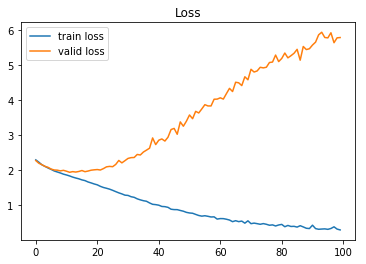

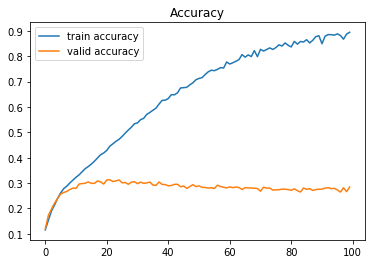

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()